In [3]:
!pip install transformers -q
!pip install huggingface -q
from transformers import pipeline

In [4]:
!python -m spacy download es_core_news_lg -q
import spacy
nlp=spacy.load("es_core_news_lg")

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [277]:
import nltk
import pandas as pd
import numpy as np
from IPython.display import display
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import joblib
from joblib import load 
from joblib import dump
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [324]:
!pip install scikit-learn==1.5.1

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [328]:
from transformers import pipeline
sentiment = pipeline("sentiment-analysis", model="pysentimiento/robertuito-sentiment-analysis")


Device set to use cpu


In [414]:
df_ok=pd.read_csv("Train_Data.csv", delimiter=',',encoding='utf-8')
df1=df_ok['Etiqueta'].value_counts()
df1

Etiqueta
POS    175
NEG    152
NEU    141
Name: count, dtype: int64

In [416]:
x1=df_ok[df_ok['Etiqueta']=='POS']
x2=df_ok[df_ok['Etiqueta']=='NEG']
x3=df_ok[df_ok['Etiqueta']=='NEU']
Nx1=x1.head(140)
Nx2=x2.head(140)
Nx3=x3.head(140)
df=pd.concat([Nx1,Nx2,Nx3])
df

,Texto de la reseña,Etiqueta
0,Una obra maestra del cine español. La atmósfer...,POS
1,"La fotografía es espectacular, cada plano pare...",POS
2,Un thriller policíaco que mantiene la tensión ...,POS
3,Las actuaciones de los protagonistas son sobre...,POS
4,"La ambientación es increíble, realmente te tra...",POS
...,...,...
462,"""La película equilibra acción y drama de forma...",NEU
463,"""El diseño de vestuario y escenarios es apropi...",NEU
464,"""No es la mejor obra de Ridley Scott, pero tam...",NEU
465,"""La película ofrece una mezcla de acción y dra...",NEU


In [418]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  
    texto = re.sub(r'\d+', '', texto)     
    palabras =word_tokenize(texto)
    doc = nlp(' '.join(palabras))
    palabras = [token.lemma_ for token in doc]
    return ' '.join(palabras)

df_texto=df['Texto de la reseña'].apply(limpiar_texto)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [419]:
df1 = pd.concat([df_texto, df['Etiqueta']], axis=1)
df1.columns = ['Texto de la reseña', 'Etiqueta']
df1=shuffle(df1, random_state=42)
df1

,Texto de la reseña,Etiqueta
25,él notar que el director querer imitar a el gr...,NEG
154,el fotografía ser adecuado pero no alcanzar a ...,NEU
113,el guion carecer de profundidad,NEG
307,aunque el cinematografía ser hermoso el pelícu...,NEU
463,el diseño de vestuario y escenario ser apropia...,NEU
...,...,...
200,cada escena estar lleno de color y vida transp...,POS
275,uno exploración profundo y conmovedor de el co...,POS
406,el diálogo ser básico y sin fuerza como si ser...,NEG
227,el película ser visualmente atractivo pero car...,NEU


In [336]:
y =df1['Etiqueta']
label_to_number = {'POS': 1, 'NEG': -1, 'NEU': 0}
numeric_labels = np.vectorize(label_to_number.get)(y)
print(numeric_labels)

df_count=df1['Etiqueta'].value_counts()
df_count

[-1  0 -1  0  0  1  1  1  1  1  1  1  0  1  0  0  1 -1 -1 -1 -1 -1  0 -1
  1  0  1  0 -1  1  0  1 -1 -1  0 -1 -1  1 -1 -1  1  1  0  1  1  0 -1  0
  0  1  1  0  1  1  0 -1  0 -1  1  1  0  1  1  0 -1  0 -1  1 -1  0  1  0
  0 -1  1  1  0  1  0  0  1  0  1  1  1  1  1  1  0  0  0 -1 -1 -1 -1  1
  1  0  0  0 -1  1  0 -1  0  1  1  0  1 -1 -1  1  1  0  0  1  0  0  0  1
  1 -1  0  1  1  0  1 -1  0  1  1  0 -1 -1 -1  0  0 -1 -1  0  1 -1 -1 -1
 -1  1 -1 -1  1 -1  1 -1 -1 -1  0  0  0  0  0  0  1  1  0 -1 -1  0  1  1
  0 -1  1  0  0 -1 -1  1 -1  1  1  0  0 -1  0 -1 -1  0  0  1 -1 -1 -1 -1
  1  1  1 -1  1  1 -1  0  0  1  0  1  1  1 -1  1 -1 -1 -1  1  0  0 -1 -1
  0 -1  1 -1  0  1  0 -1 -1  0  0 -1  0 -1 -1  0  0  0  1  1  1  0 -1 -1
  1 -1 -1  0  0  0  1  0  0  0  0 -1  0 -1 -1  0  1 -1 -1  1  1 -1  0  0
  1  0  1  0  1  0  1  0  1  1 -1 -1 -1  1  1  1 -1 -1  0  0 -1  1  1 -1
  0  0 -1  1  0 -1  0 -1  0  1 -1  0  1 -1  0 -1 -1  1  0 -1  1  1  1 -1
 -1  0  1  0 -1 -1  0 -1  0  1  1  1  1  1  1  0  1

Etiqueta
NEG    140
NEU    140
POS    140
Name: count, dtype: int64

In [430]:

y_test=numeric_labels
X = df1['Texto de la reseña']
predicciones = []
for texto in X:
    resultado = sentiment(texto)[0] 
    predicciones.append(resultado['label'])
mapeo = {"NEG": -1, "NEU": 0, "POS": 1}
predicciones_numericas = [mapeo[pred] for pred in predicciones]
print("Reporte de Clasificación:\n")
print(classification_report(y_test, predicciones_numericas))
accuracy = accuracy_score(y_test, predicciones_numericas)
print(f"Accuracy Robertuito: {accuracy * 100:.2f}%")





Reporte de Clasificación:

              precision    recall  f1-score   support

          -1       0.74      0.83      0.78       140
           0       0.63      0.51      0.56       140
           1       0.80      0.84      0.82       140

    accuracy                           0.73       420
   macro avg       0.72      0.73      0.72       420
weighted avg       0.72      0.73      0.72       420

Accuracy Robertuito: 72.86%


In [432]:
X = df1['Texto de la reseña']
y = numeric_labels  # Etiquetas originales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=42, stratify=y)
Vectorizar=input('Vectorizador: TFIDF , COUNT')
if Vectorizar=='COUNT':
    vectorizer=CountVectorizer(ngram_range=(1, 2),       # Extrae unigramas y bigramas
                                max_features=1000,          # Limita el vocabulario a los 10 términos más comunes
                                lowercase=True,           # Convierte el texto a minúsculas
                                binary=False              # Frecuencias normales (no binarias)
                            )
    X_train_vectorized = vectorizer.fit_transform(X_train)  # Entrenamiento
    X_test_vectorized = vectorizer.transform(X_test)  # Prueba
    joblib.dump(vectorizer, 'vectorizador_CountVectorizer.pkl')
else:                          
    vectorizer = TfidfVectorizer(max_features=1000,           # Limita el vocabulario a las 10 palabras/tokens más frecuentes
                                 ngram_range=(1, 2),      # Usa unigramas y bigrama
                                        # Suaviza los valores de IDF para evitar extremos
                            )
    X_train_vectorized = vectorizer.fit_transform(X_train)  # Entrenamiento
    X_test_vectorized = vectorizer.transform(X_test)  # Prueba
    joblib.dump(vectorizer, 'vectorizador_tfidf.pkl')
    

Vectorizador: TFIDF , COUNT TFIDF



Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.86      0.86      0.86         7
           0       1.00      0.71      0.83         7
           1       0.78      1.00      0.88         7

    accuracy                           0.86        21
   macro avg       0.88      0.86      0.86        21
weighted avg       0.88      0.86      0.86        21

KFOLD
Precisión en cada fold: [0.7375     0.8        0.75       0.8125     0.74683544]
Promedio de precisión: 76.94%, Desviación: 0.03


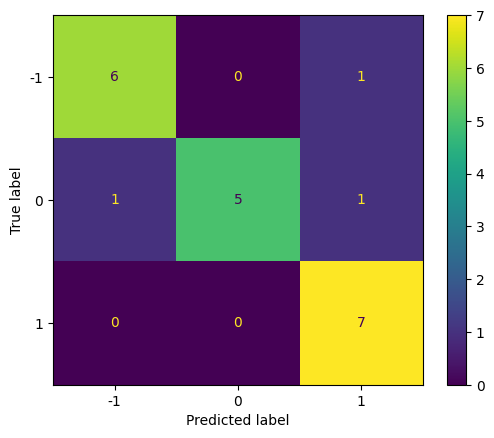

In [434]:
modelLoR =LogisticRegression(max_iter=1000, solver='liblinear',C=50,random_state=42 )   
modelLoR.fit(X_train_vectorized, y_train)
y_pred = modelLoR.predict(X_test_vectorized)
modelLoR.score(X_train_vectorized, y_train)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(modelLoR, X_train_vectorized, y_train, cv=kfold, scoring='accuracy')
print("KFOLD")
print("Precisión en cada fold:", scores)
print(f'Promedio de precisión: {scores.mean()*100:,.2f}%, Desviación: {np.std(scores):.2f}')
matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modelLoR.classes_)
joblib.dump(modelLoR, 'modelo_LoR.pkl')
disp.plot()
plt.show()



Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.71      0.71      0.71         7
           0       0.71      0.71      0.71         7
           1       0.86      0.86      0.86         7

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21

KFOLD
Precisión en cada fold: [0.7625     0.7625     0.7125     0.7875     0.72151899]
Promedio de precisión: 74.93%, Desviación: 0.03


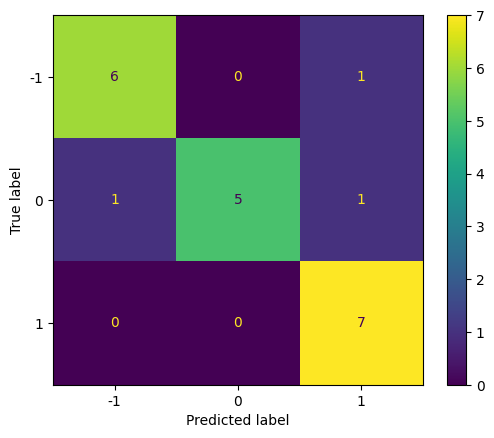

In [436]:
modelNB = MultinomialNB()
modelNB.fit(X_train_vectorized, y_train)
y_pred = modelNB.predict(X_test_vectorized)
modelNB.score(X_train_vectorized, y_train)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modelNB.classes_)
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scoresNB = cross_val_score(modelNB, X_train_vectorized, y_train, cv=kfold, scoring='accuracy')
print("KFOLD")
print("Precisión en cada fold:", scoresNB)
print(f'Promedio de precisión: {scoresNB.mean()*100:,.2f}%, Desviación: {np.std(scoresNB):.2f}')
joblib.dump(modelNB, 'modelo_NB.pkl')
disp.plot()
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.86      0.86      0.86         7
           0       1.00      0.71      0.83         7
           1       0.78      1.00      0.88         7

    accuracy                           0.86        21
   macro avg       0.88      0.86      0.86        21
weighted avg       0.88      0.86      0.86        21

KFOLD
Precisión en cada fold: [0.75       0.8        0.7375     0.8375     0.73417722]
Promedio de precisión: 77.18%, Desviación: 0.04


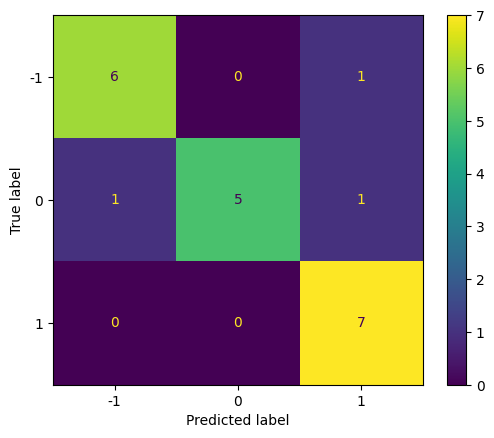

In [438]:
model_LSVC = LinearSVC(max_iter=1000,loss='squared_hinge')
model_LSVC.fit(X_train_vectorized, y_train)
y_pred = model_LSVC.predict(X_test_vectorized)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred, labels=model_LSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model_LSVC.classes_)
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(model_LSVC, X_train_vectorized, y_train, cv=kfold, scoring='accuracy')
print("KFOLD")
print("Precisión en cada fold:", scores)
print(f'Promedio de precisión: {scores.mean()*100:,.2f}%, Desviación: {np.std(scores):.2f}')
joblib.dump(model_LSVC, 'modelo_LSVC.pkl')
disp.plot()
plt.show()


Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.86      0.86      0.86         7
           0       0.71      0.71      0.71         7
           1       0.86      0.86      0.86         7

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

KFOLD
Precisión en cada fold: [0.7625     0.8125     0.725      0.8        0.73417722]
Promedio de precisión: 76.68%, Desviación: 0.03


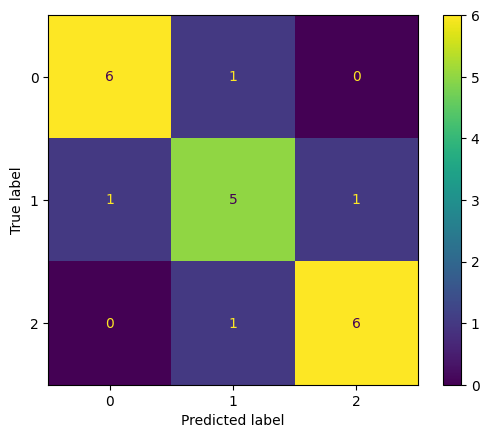

In [440]:
model_SVC = SVC(kernel='linear',C=1.0,gamma=0.1, random_state=42)  
model_SVC.fit(X_train_vectorized, y_train)
y_pred = model_SVC.predict(X_test_vectorized)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred, labels=model_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(model_SVC, X_train_vectorized, y_train, cv=kfold, scoring='accuracy')
print("KFOLD")
print("Precisión en cada fold:", scores)
print(f'Promedio de precisión: {scores.mean()*100:,.2f}%, Desviación: {np.std(scores):.2f}')
joblib.dump(model_SVC, 'modelo_SVC.pkl')
disp.plot()
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.60      0.86      0.71         7
           0       1.00      0.86      0.92         7
           1       0.80      0.57      0.67         7

    accuracy                           0.76        21
   macro avg       0.80      0.76      0.77        21
weighted avg       0.80      0.76      0.77        21

KFOLD
Precisión en cada fold: [0.675      0.6625     0.6375     0.6625     0.62025316]
Promedio de precisión: 65.16%, Desviación: 0.02


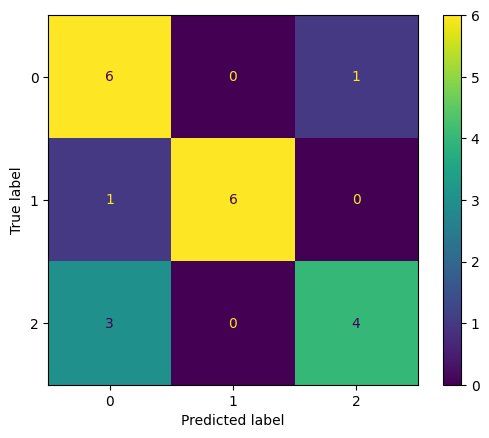

In [442]:
model_DT=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=1000,random_state=42)
model_DT.fit(X_train_vectorized, y_train)
y_pred = model_DT.predict(X_test_vectorized)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred, labels=model_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(model_DT, X_train_vectorized, y_train, cv=kfold, scoring='accuracy')
print("KFOLD")
print("Precisión en cada fold:", scores)
print(f'Promedio de precisión: {scores.mean()*100:,.2f}%, Desviación: {np.std(scores):.2f}')
joblib.dump(model_DT, 'modelo_DT.pkl')
disp.plot()
plt.show()

In [390]:

models = []
models.append(('LoR', modelLoR))
models.append(('NB', modelNB))
models.append(('CART', model_DT))
models.append(('SVC', model_SVC))
models.append(('LSVC',  model_LSVC))
# evaluate each model in turn
results = []
names = []
df_data=[]
scoring = 'accuracy'
estadistica=[]
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_vectorized, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_data.append({
        'Modelo': name,
        'Precisión Media (%)': cv_results.mean() * 100,
        'Desviación (%)': cv_results.std() * 100
    })
    print(f'{Vectorizar}:{name}:{cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')
y_test=numeric_labels
X = df1['Texto de la reseña']
predicciones = []
for texto in X:
    resultado = sentiment(texto)[0]  # Usar el pipeline para cada texto
    predicciones.append(resultado['label'])
accuracy = accuracy_score(y_test, predicciones_numericas)
print( f"RObertuito: {accuracy * 100:.2f}%")




TFIDF:LoR:76.94% (3.06%)
TFIDF:NB:74.93% (2.80%)
TFIDF:CART:65.16% (1.98%)
TFIDF:SVC:76.68% (3.47%)
TFIDF:LSVC:77.18% (4.04%)
RObertuito: 72.86%


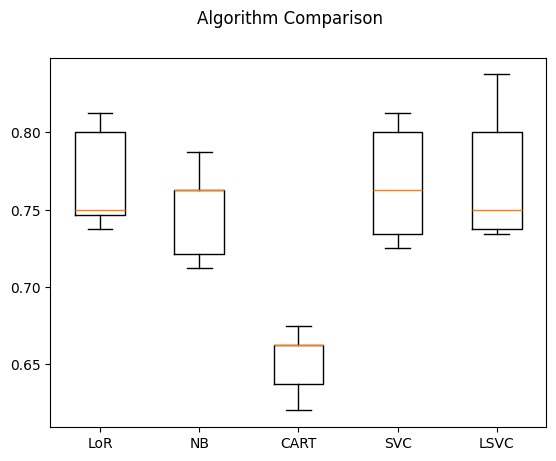

In [444]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [446]:
if Vectorizar=='TFIDF':
    df_TFIDF=pd.DataFrame(df_data)
    print('Resultados para TFIDF:')
    display(df_TFIDF)
else:
    df_Count=pd.DataFrame(df_data)
    print('Resultados para CountVectorized:')
    display(df_Count)

Resultados para TFIDF:


,Modelo,Precisión Media (%),Desviación (%)
0,LoR,76.936709,3.064994
1,NB,74.930380,2.804904
2,CART,65.155063,1.983231
3,SVC,76.683544,3.470072
4,LSVC,77.183544,4.044485


In [448]:
new_reviews=["Es una pelicula que cumple pero no destaca",
        "la producción es impecable", 
        "el guion carece de profundidad",
        "el desarrollo de sus personajes es superficial y poco convincente.",
        " Hay secuencias bien logradas",
        "el guion no tiene el mismo impacto emocional que la primera película.",
        "Paul Mescal y Pedro Pascal ofrecen actuaciones sobresalientes", 
        "la trama no alcanza el mismo nivel de profundidad emocional que su predecesora",
        "Las escenas de acción y la banda sonora son impresionantes",
        "la falta de un personaje tan icónico como Máximo resta un poco de fuerza a la narrativa"
       ]


In [398]:
etiquetado = []
for name, model in models:
    new_reviews_vectorized = vectorizer.transform(new_reviews)  
    prediction = model.predict(new_reviews_vectorized) 
    for i, (review, sent) in enumerate(zip(new_reviews, prediction)):
        if len(etiquetado) <= i:
            etiquetado.append({'texto': review})
        etiquetado[i][name] = sent
res=sentiment(new_reviews)
mapeo = {"NEG": -1, "NEU": 0, "POS": 1}
number= [mapeo[pred['label']] for pred in res]
df_resultados = pd.DataFrame(etiquetado)
df_resultados['Robertuito']=number
df_resultados



,texto,LoR,NB,CART,SVC,LSVC,Robertuito
0,Es una pelicula que cumple pero no destaca,0,0,0,0,0,0
1,la producción es impecable,1,1,-1,1,1,1
2,el guion carece de profundidad,-1,-1,-1,-1,-1,-1
3,el desarrollo de sus personajes es superficial...,-1,-1,-1,-1,-1,-1
4,Hay secuencias bien logradas,1,1,-1,1,1,1
5,el guion no tiene el mismo impacto emocional q...,-1,-1,-1,-1,-1,-1
6,Paul Mescal y Pedro Pascal ofrecen actuaciones...,-1,-1,-1,1,-1,1
7,la trama no alcanza el mismo nivel de profundi...,-1,-1,-1,-1,-1,-1
8,Las escenas de acción y la banda sonora son im...,0,1,-1,1,1,1
9,la falta de un personaje tan icónico como Máxi...,-1,-1,-1,-1,-1,-1
